#1. Histograma de Cores

Nos vídeos abaixo, eu discuto o tema de histograma de cores em imagens digitais.

<a href="https://www.youtube.com/watch?v=ioa_mFB_nFg"><img src="https://img.youtube.com/vi/ioa_mFB_nFg/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=83RZSK1j8Ak"><img src="https://img.youtube.com/vi/83RZSK1j8Ak/mqdefault.jpg"/></a>

Nesse exercício, quero que você selecione 2 imagens distintas entre si. Uma deve ser preto e branco e a outra colorida.

Plote (desenhe o gráfico) dos seus histogramas na tela via Python e OpenCV.

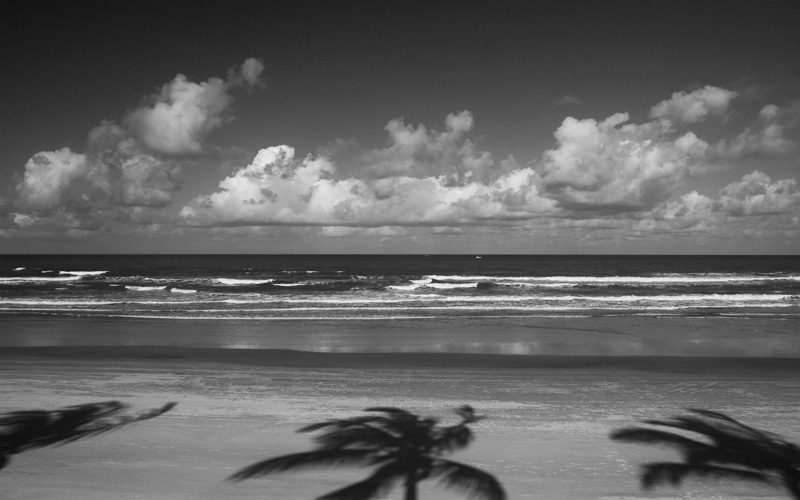

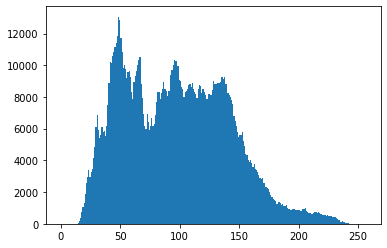

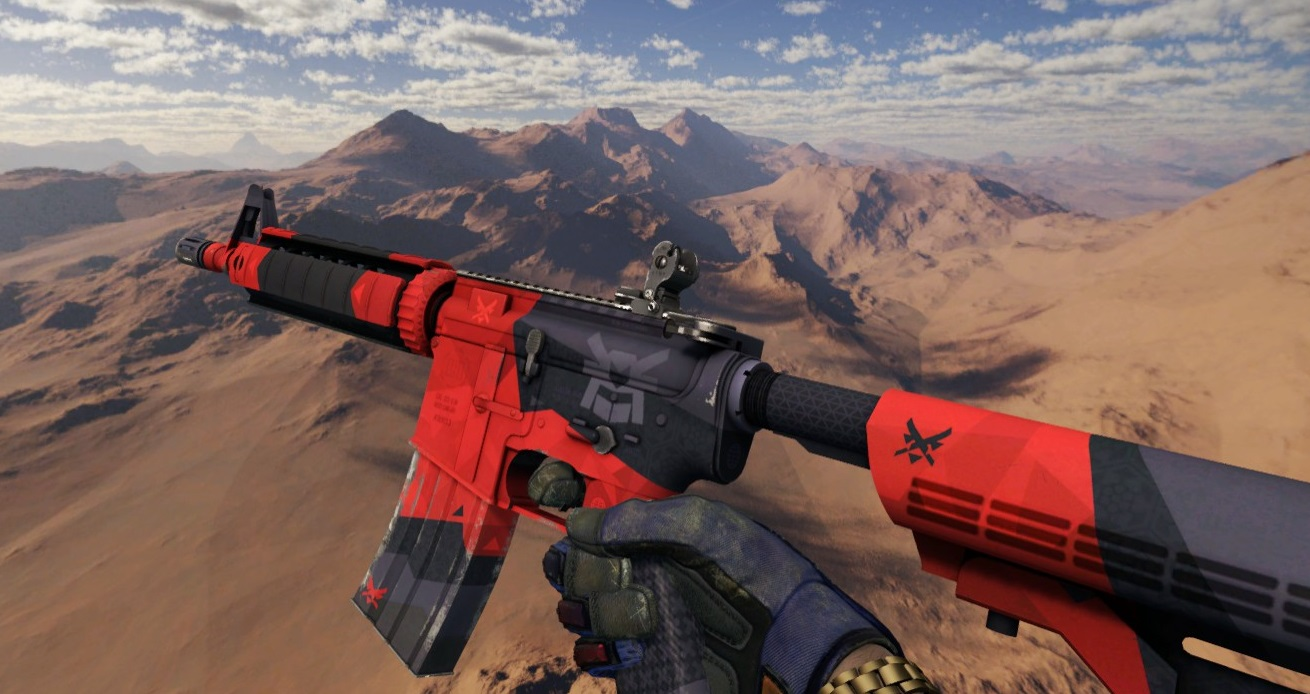

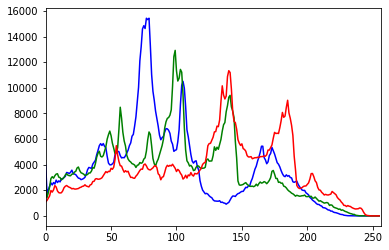

In [13]:
# Resolução

from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

def histPB():
  pb = cv2.imread("/content/praia-pb.jpg")
  
  # .ravel() transorma a matriz 2d para vetor
  # cada tom representado por um ponto em x = 256
  # intervalo do histograma
  plt.hist(pb.ravel(), 256, [0, 256])

  cv2_imshow(pb)
  plt.show()

histPB()

def histCor():
  imgCor = cv2.imread("/content/m4a4-colorida.jpg")
  # um histograma pra cada canal, crio uma lista de elementos de cada canal
  color = ('b', 'g', 'r')

  # i = index, col = elemento[i]
  for i, col in enumerate(color):
    hist = cv2.calcHist([imgCor], [i], None, [256], [0, 256]) #(imagem, identificador do histograma, imagem toda = None, bins, intervalo de início e fim)
    plt.plot(hist, color = col) # plota o histograma do canal específico
    plt.xlim([0, 256])

  cv2_imshow(imgCor)
  plt.show()

histCor()





#2. Equalização de histograma

Utilizando a ideia dessa página, crie um algoritmo que faça a equalização de histograma da imagem abaixo, a fim de melhorar seu contraste. 

Sugestão: <a href="https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html">siga este tutorial</a>.

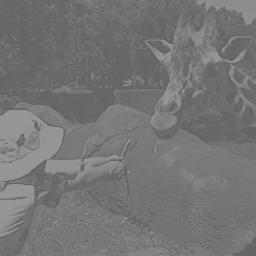

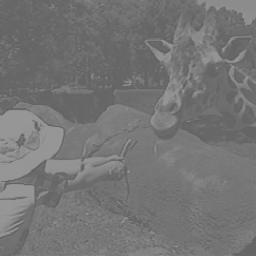

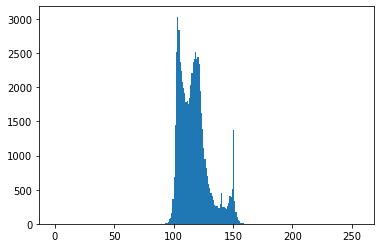

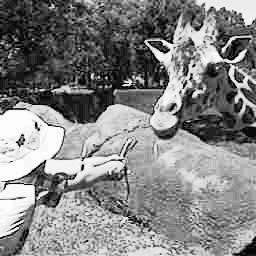

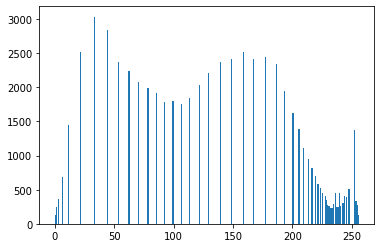

In [22]:
# Resolução

from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/girafa.png") # Carrega uma imagem
img = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY) # Converta a imagem original em tons de cinza

imgEq = cv2.equalizeHist(img) # Equalize o histograma usando a função OpenCV cv :: equalizeHist

cv2_imshow(img)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

cv2_imshow(imgEq)
plt.hist(imgEq.ravel(), 256, [0, 256])
plt.show()


#3. Meu primeiro buscador de imagens!

[Um jeito muito simples de verificar se uma imagem é igual a outra  é por meio de comparação entre histogramas](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html). 

Dito isso, você deverá fazer o seguinte:

* Crie uma pasta contendo ao menos 5 imagens, das quais duas precisam ser muito similares em seu conteúdo visual (mas não idênticas). Para facilitar, vamos chamar as imagens muito parecidas de S1 e S2. As imagens restantes que são diferentes, serão D1, D2 e D3.
* Faça uma função que receba as imagens S1 e compare ela com S2, D1, D2 e D3 pelo histograma. 
* Compare a distância de S1 para cada imagem considerando as métricas da Correlação, Chi-Square e Bhattacharrya. 
* Para cada imagem, some as três distâncias ao quadrado e aplique a raiz quadrada: sqrt(Corr^2 + Chi-Sq^2 + Bhatta^2)
* Retorne a imagem mais parecida com S1 (o par que tiver a menor distância)

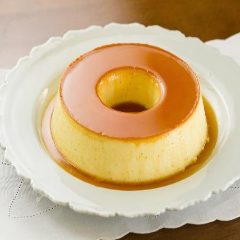

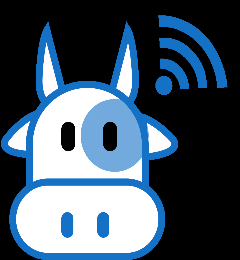

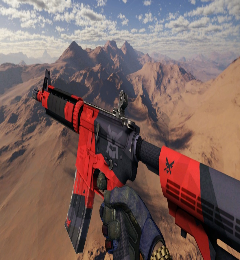

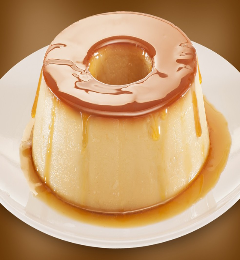

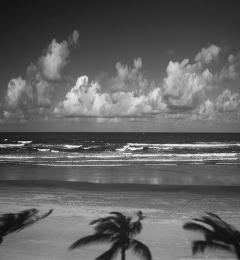

A imagem mais parecida com a S1 é a S2 com o resultado igual a 55565 .


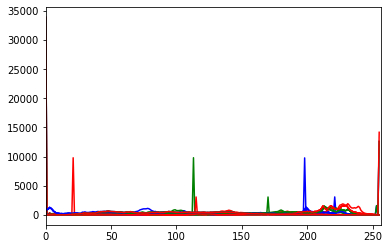

In [84]:
# Resolução

from google.colab.patches import cv2_imshow
import cv2, math
import numpy as np
from matplotlib import pyplot as plt

def compararImg(img1, img2):
  
  img2 = cv2.resize(img2, (240, 260))
  cv2_imshow(img2)

  color = ('b', 'g', 'r')

  for i, col in enumerate(color):
    hist1 = cv2.calcHist([img1], [i], None, [256], [0,256])
    plt.plot(hist1, color = col)
    plt.xlim([0, 256])

  for i, col in enumerate(color):
    hist2 = cv2.calcHist([img2], [i], None, [256], [0,256])
    plt.plot(hist2, color = col)
    plt.xlim([0, 256])

  correl = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
  chisquare = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)
  bhatta = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)

  r = math.sqrt(math.pow(correl, 2) + math.pow(chisquare, 2) + math.pow(bhatta, 2))
  return r


def main():
  
  s1 = cv2.imread("/content/S1.jpg")
  s1 = cv2.resize(s1, (240, 240))
  cv2_imshow(s1)
  
  s2 = cv2.imread("/content/S2.jpg")
  d1 = cv2.imread("/content/m4a4-colorida.jpg")
  d2 = cv2.imread("/content/praia-pb.jpg")
  d3 = cv2.imread("/content/d3.png")

  r1 = int(compararImg(s1, d3))
  r2 = int(compararImg(s1, d1))
  r3 = int(compararImg(s1, s2))
  r4 = int(compararImg(s1, d2))

  resultados = [r1, r2, r3, r4]
  pares = ['D3', 'D1', 'S2', 'D2']

  menorDistancia = resultados[0]
  posicao = 0

  for i in range(0, len(resultados)):
    if (menorDistancia > resultados[i]):
      menorDistancia = resultados[i]
      posicao = i


  print("A imagem mais parecida com a S1 é a", pares[posicao], "com o resultado igual a", menorDistancia, ".")


main()



#4. Vídeo da Erosão e Dilatação

Crie duas funções chamada videoErosao e videoDilatacao.

A função videoErosao() receberá uma imagem em preto e branco como a apresentada abaixo e deverá aplicar a operação de erosão sucessivamente, até ela desaparecer. Faça um vídeo que aplique essa operação aos poucos, em formato de animação.

Realize procedimento parecido para videoDilatacao(), só que fazendo o oposto com a operação de erosão.

OBS: <a href="https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html">Esse texto deverá ajudar</a>.

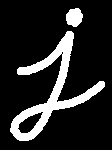

In [ ]:
# Resolução

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def videoErosao():
  

def videoDilatacao():
